In [1]:
0#This is Good Practioce for the moment

!rm -rf /opt/conda/lib/python3.10/site-packages/fsspec*
!pip install fsspec==2024.6.0 --force-reinstall --no-deps
!pip install opencv-python

  Using cached fsspec-2024.6.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)


In [2]:
#install also to vizualize figures
!sudo apt-get update
!sudo apt-get install -y libgl1-mesa-glx
!sudo apt-get install -y libglib2.0-0

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                      
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [3]:
import pandas as pd

#Kaggle Files
rd = './kaggle-files'

df = pd.read_csv(f'{rd}/train.csv')

df = df.fillna(-100)
label2id = {'Normal/Mild': 0, 'Moderate':1, 'Severe':2}
df = df.replace(label2id)

df.head()

study_id  spinal_canal_stenosis_l1_l2  spinal_canal_stenosis_l2_l3  \
0   4003253                            0                            0   
1   4646740                            0                            0   
2   7143189                            0                            0   
3   8785691                            0                            0   
4  10728036                            0                            0   

   spinal_canal_stenosis_l3_l4  spinal_canal_stenosis_l4_l5  \
0                            0                            0   
1                            1                            2   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   spinal_canal_stenosis_l5_s1  left_neural_foraminal_narrowing_l1_l2  \
0                            0                                      0   
1                            0                                      0   
2                            0                                      0   
3                            0                                      0   
4                            0                                      0   

   left_neural_foraminal_narrowing_l2_l3  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   left_neural_foraminal_narrowing_l3_l4  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   left_neural_foraminal_narrowing_l4_l5  ...  \
0                                      1  ...   
1                                      1  ...   
2                                      0  ...   
3                                      1  ...   
4                                      0  ...   

   left_subarticular_stenosis_l1_l2  left_subarticular_stenosis_l2_l3  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   left_subarticular_stenosis_l3_l4  left_subarticular_stenosis_l4_l5  \
0                                 0                                 1   
1                                 0                                 2   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   left_subarticular_stenosis_l5_s1  right_subarticular_stenosis_l1_l2  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   right_subarticular_stenosis_l2_l3  right_subarticular_stenosis_l3_l4  \
0                                  0                                  0   
1                                  1                                  1   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   right_subarticular_stenosis_l4_l5  right_subarticular_stenosis_l5_s1  
0                                  0                                  0  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the coordinates data
coordinates_df = pd.read_csv(f'{rd}/train_label_coordinates.csv')


coordinates_df.head()

study_id  series_id  instance_number              condition  level  \
0   4003253  702807833                8  Spinal Canal Stenosis  L1/L2   
1   4003253  702807833                8  Spinal Canal Stenosis  L2/L3   
2   4003253  702807833                8  Spinal Canal Stenosis  L3/L4   
3   4003253  702807833                8  Spinal Canal Stenosis  L4/L5   
4   4003253  702807833                8  Spinal Canal Stenosis  L5/S1   

            x           y  
0  322.831858  227.964602  
1  320.571429  295.714286  
2  323.030303  371.818182  
3  335.292035  427.327434  
4  353.415929  483.964602

In [5]:
CONDITIONS = coordinates_df['condition'].unique()

LEVELS = coordinates_df['level'].unique()

In [6]:
series_description_df = pd.read_csv(f'{rd}/train_series_descriptions.csv')
series_description_df['series_description'] = series_description_df['series_description'].str.replace('T2/STIR', 'T2_STIR')
series_description_df.head()



study_id   series_id series_description
0   4003253   702807833   Sagittal T2_STIR
1   4003253  1054713880        Sagittal T1
2   4003253  2448190387           Axial T2
3   4646740  3201256954           Axial T2
4   4646740  3486248476        Sagittal T1

In [7]:
print(df.columns)
print(coordinates_df.columns)
print(series_description_df.columns)
print(CONDITIONS)
print(LEVELS)

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

## BUilding the Dataloader

To summarize, the `dataloader` will:
- Load images from different series descriptions (e.g., 'Sagittal T1', 'Sagittal T2_STIR', 'Axial T2') for each `study_id`.
- Use the `coordinates_df` to access the `x`, `y` annotations for specific conditions and levels when available.
- Combine the information from `df` to create labels for the different conditions and levels.

### DataLoader Steps
1. **Load Images by Study**: For each `study_id`, load slices from each `series_description` into a tensor.
2. **Annotations**: Use `coordinates_df` to check if a condition has an associated `x`, `y` coordinate. If not, handle the absence gracefully.
3. **Label Extraction**: Use `df` to extract the condition-level labels for each study.
4. **Return Image and Labels**: Output images and labels, with a focus on condition-level features.


In [8]:
import os
import torch
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from glob import glob
from PIL import Image

IMG_SIZE = [512, 512]  # Image dimensions (height, width)
IN_CHANS = 70  # Total number of slices, accounting for maximum Axial slices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Precomputed mean and std for medical images (you can calculate them for your specific dataset)
IMG_MEAN = 0.5  # Example value, replace with actual mean if calculated
IMG_STD = 0.25  # Example value, replace with actual std if calculated

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, series_description_df, img_size=(512, 512), in_chans=70, transform=None):
        self.df = df
        self.coordinates_df = coordinates_df
        self.series_description_df = series_description_df
        self.img_size = img_size
        self.in_chans = in_chans
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor for all slices
        x = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)
        t = self.df.iloc[idx]
        st_id = t['study_id']  # Get the study ID
        label = t[1:].values.astype(np.int64)  # Labels for conditions and levels

        # Load images from the given study_id across different series descriptions
        series_descriptions = ['Sagittal T1', 'Sagittal T2_STIR', 'Axial T2']
        channel_offset = 0

        for desc in series_descriptions:
            images = glob(f'./rsna_output/cvt_png/{st_id}/{desc}/*.png')
            images = sorted(images)
            slice_num = self.in_chans - 20
            if desc == 'Axial T2':
                num_images = len(images)
                if num_images > slice_num:
                    # Truncate the number of Axial slices to 50 if more are available
                    images = images[:slice_num]
                elif num_images < slice_num:
                    # Pad with None if there are fewer than 50 Axial slices
                    padding_slices = slice_num - num_images
                    images += [None] * padding_slices  # Add None placeholders for padding
            else:
                num_images = min(len(images), 10)  # Sagittal limited to 10 slices
        
            for i in range(len(images)):  # Use len(images) for proper loop range
                if images[i] is not None:  # Load and process valid images
                    try:
                        img = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
                        img_resized = cv2.resize(img, (self.img_size[1], self.img_size[0]))
                        x[..., channel_offset + i] = img_resized.astype(np.float32)
                    except Exception as e:
                        continue
                else:
                    # Padding: leave the channel as zeros (already initialized as zeros)
                    continue
        
            channel_offset += len(images)  # Update offset based on number of slices loaded

        # Normalize the image data: [0, 1] scaling
        x = x / 255.0
        
        # Apply mean and std normalization
        x = (x - IMG_MEAN) / IMG_STD

        # Load coordinates from coordinates_df if they exist for this study
        condition_annotations = []
        condition_coords = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        if not condition_coords.empty:
            for _, row in condition_coords.iterrows():
                x_coord, y_coord = row['x'], row['y']
                if x_coord != -1 and y_coord != -1:  # Valid coordinates
                    condition_annotations.append((x_coord, y_coord))
                else:
                    condition_annotations.append((-1, -1))  # Dummy value for missing coordinates
        else:
            condition_annotations = [(-1, -1)] * len(self.df.columns[1:])

        return x, label, condition_annotations


In [9]:
# # Test Visualizing sample batch

# tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
# tmp_dl = DataLoader(
#     tmp_ds,
#     batch_size=2,
#     shuffle=False,
#     pin_memory=True,
#     drop_last=False,
#     num_workers=0
# )

# for i, (x, label, annotations) in enumerate(tmp_dl):
#     if i == 0:  # Visualize the first sample
#         print(f"Image tensor shape: {x.shape}")
#         print(f"Labels: {label}")
#         print(f"Annotations: {annotations}")
#         break

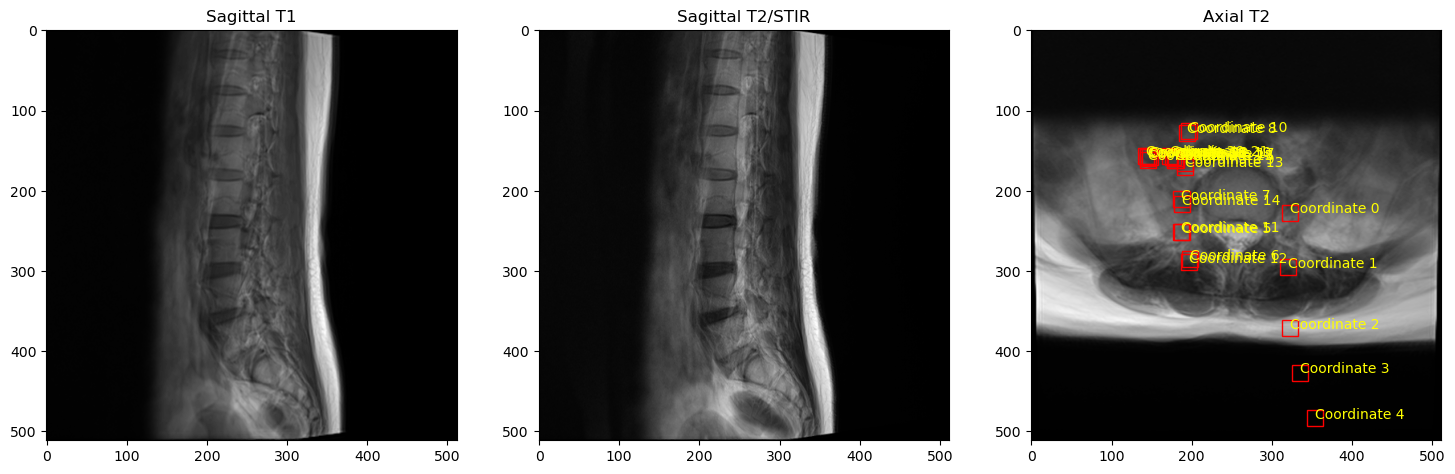

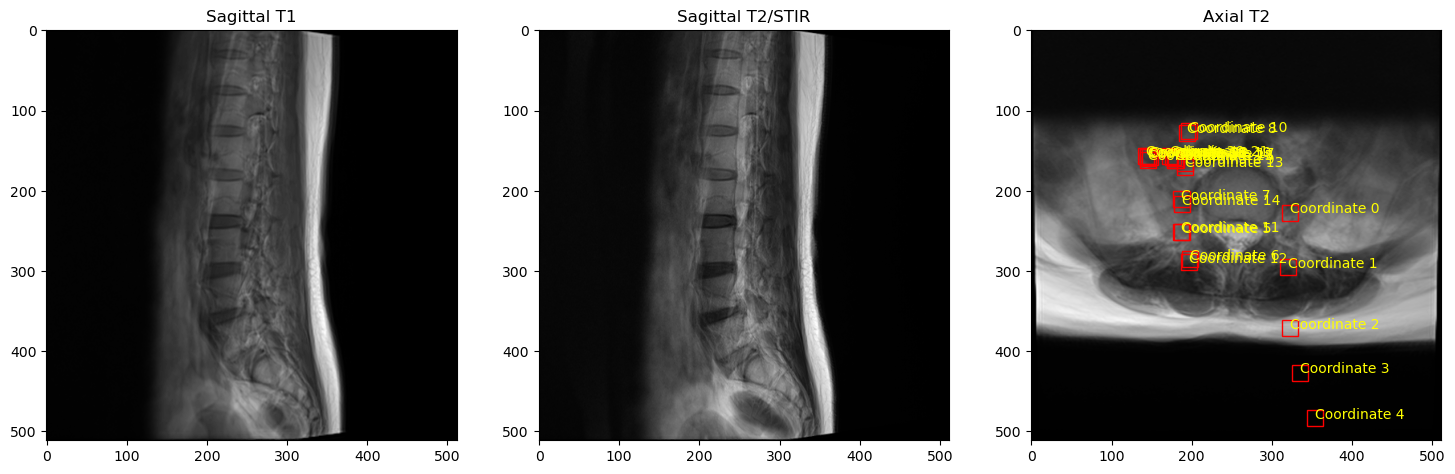

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Instantiate DataLoader
tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)



def plot_study_with_box(dataloader, study_idx):
    # Get the data for the specified study
    images, labels, annotations = dataloader[study_idx]

    # Plot one slice from each type: Sagittal T1, Sagittal T2_STIR, Axial T2
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Slice for Sagittal T1 (First 10 channels)
    sag_t1_img = images[:, :, :10].mean(axis=-1)  # Take average over channels to get one image
    axs[0].imshow(sag_t1_img, cmap='gray')
    axs[0].set_title('Sagittal T1')

    # Slice for Sagittal T2_STIR (Next 10 channels)
    sag_t2_img = images[:, :, 10:20].mean(axis=-1)
    axs[1].imshow(sag_t2_img, cmap='gray')
    axs[1].set_title('Sagittal T2/STIR')

    # Slice for Axial T2 (Remaining channels)
    axial_img = images[:, :, 20:].mean(axis=-1)
    axs[2].imshow(axial_img, cmap='gray')
    axs[2].set_title('Axial T2')

    # Add the box for coordinates (valid coordinates)
    for i, coords in enumerate(annotations):
        if len(coords) == 2:  # Ensure it's a coordinate pair
            x, y = coords
            if x != -1 and y != -1:  # Only plot valid coordinates
                box = patches.Rectangle((x-10, y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
                axs[2].add_patch(box)  # Example: Plot on Axial T2
                axs[2].text(x, y, f'Coordinate {i}', color='yellow')

    plt.show()

# Test with a specific study (e.g., study_idx = 0)
plot_study_with_box(tmp_ds, study_idx=0)


# Test with a specific study (e.g., study_idx = 0)
plot_study_with_box(tmp_ds, study_idx=0)


## Creating the model

1. **Separate Convolutional Branches**: 
   - Each branch processes the 10 slices from a specific series description (`Sagittal T1`, `Sagittal T2_STIR`, `Axial T2`) independently.
   - After two convolutional and pooling layers, the feature maps are flattened.

2. **Feature Combination**:
   - The flattened feature maps from all three branches are concatenated and passed through fully connected layers.

3. **Dual Output**:
   - The model produces two outputs:
     - **condition_pred**: A 25-class classification output for the condition labels.
     - **coord_pred**: A 2-dimensional prediction for the x, y coordinates.


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNHybridModel(nn.Module):
    def __init__(self):
        super(CNNHybridModel, self).__init__()
        # Convolutional layers for Sagittal T1 and T2_STIR (each with 10 input channels)
        self.conv1_sag = nn.Conv2d(10, 32, kernel_size=3, padding=1)  # Sagittal conv
        self.conv2_sag = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3_sag = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Convolutional layers for Axial T2 (now with 50 input channels)
        self.conv1_axial = nn.Conv2d(IN_CHANS - 20, 32, kernel_size=3, padding=1)  # Axial conv
        self.conv2_axial = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3_axial = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(1572864, 512)  # Adjusted input size
        self.fc2 = nn.Linear(512, 256)
        
        # Output heads for condition prediction and coordinate prediction
        self.fc_condition = nn.Linear(256, 25)  # Predict 25 conditions
        self.fc_coords = nn.Linear(256, 2)  # Predict x and y coordinates

    def forward(self, x_sagittal_t1, x_sagittal_t2_stir, x_axial_t2):
        # Apply convolutions on Sagittal T1 and T2_STIR images
        x1 = self.pool(F.relu(self.conv1_sag(x_sagittal_t1)))
        x1 = self.pool(F.relu(self.conv2_sag(x1)))
        x1 = self.pool(F.relu(self.conv3_sag(x1)))

        x2 = self.pool(F.relu(self.conv1_sag(x_sagittal_t2_stir)))  # Reuse same layers for both sagittal types
        x2 = self.pool(F.relu(self.conv2_sag(x2)))
        x2 = self.pool(F.relu(self.conv3_sag(x2)))

        # Apply convolutions on Axial T2 images
        x3 = self.pool(F.relu(self.conv1_axial(x_axial_t2)))
        x3 = self.pool(F.relu(self.conv2_axial(x3)))
        x3 = self.pool(F.relu(self.conv3_axial(x3)))

        # Flatten the feature maps before passing to fully connected layers
        x1_flat = x1.reshape(x1.size(0), -1)
        x2_flat = x2.reshape(x2.size(0), -1)
        x3_flat = x3.reshape(x3.size(0), -1)

        # Concatenate features from all three branches
        combined_features = torch.cat((x1_flat, x2_flat, x3_flat), dim=1)

        # Fully connected layers
        x = F.relu(self.fc1(combined_features))
        x = F.relu(self.fc2(x))

        # Output heads for condition and coordinates
        condition_pred = self.fc_condition(x)
        coord_pred = self.fc_coords(x)

        return condition_pred, coord_pred


# Instantiate the model
model = CNNHybridModel()
model.to(device)


CNNHybridModel(
  (conv1_sag): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_sag): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_sag): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_axial): Conv2d(50, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_axial): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_axial): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1572864, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc_condition): Linear(in_features=256, out_features=25, bias=True)
  (fc_coords): Linear(in_features=256, out_features=2, bias=True)
)

In [12]:
# !pip install torchviz

In [13]:
# from torchviz import make_dot
# from PIL import Image
# import matplotlib.pyplot as plt

# # Create dummy data to simulate model input
# batch_size = 2
# dummy_sagittal_t1 = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Sagittal T1
# dummy_sagittal_t2_stir = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Sagittal T2/STIR
# dummy_axial_t2 = torch.randn(batch_size, 10, 512, 512)  # 10 slices for Axial T2

# # Pass through the model to get a forward pass
# condition_pred, coord_pred = model(dummy_sagittal_t1, dummy_sagittal_t2_stir, dummy_axial_t2)

# # Create the computational graph
# dot = make_dot((condition_pred, coord_pred), params=dict(model.named_parameters()))

# # Render to a file and display it
# dot.render("model_diagram", format="png")  # Save as PNG

# # Load and display the image
# img = Image.open("model_diagram.png")
# plt.figure(figsize=(10, 10))  # Increase the figure size for better clarity
# plt.imshow(img)
# plt.axis('off')  # Hide axes for clarity
# plt.show()


## Building Main Train Loop

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the loss functions
classification_loss_fn = nn.CrossEntropyLoss()  # For condition classification
coordinate_loss_fn = nn.MSELoss()  # For coordinate regression

# Set up the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)






In [15]:
def train_model(model, dataloader, optimizer, num_epochs=10):
    model.train()  # Set the model to training mode
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels, annotations) in enumerate(dataloader):
            # Move images, labels, and annotations to the device (GPU)
            images = images.to(device)
            labels = labels.to(device)

            # Process images for each MRI series
            sagittal_t1_images = images[:, :, :, :10].permute(0, 3, 1, 2)  # Sagittal T1 (first 10 channels)
            sagittal_t2_stir_images = images[:, :, :, 10:20].permute(0, 3, 1, 2)  # Sagittal T2/STIR (next 10 channels)
            axial_t2_images = images[:, :, :, 20:].permute(0, 3, 1, 2)  # Axial T2 (remaining channels)

            # Multi-class classification target
            condition_labels = torch.argmax(labels[:, :25], dim=1)

            # Extract valid coordinates from annotations, handle missing or incomplete annotations
            coord_labels = []
            for annotation_set in annotations:
                if len(annotation_set) >= 2:  # Check if we have at least two coordinates
                    coord_labels.append(annotation_set[0].float())  # First set of coordinates
                    coord_labels.append(annotation_set[1].float())  # Second set of coordinates
                else:
                    coord_labels.append(torch.tensor([0.0, 0.0], device=device))
                    coord_labels.append(torch.tensor([0.0, 0.0], device=device))

            # Convert list of coordinates to tensor
            coord_labels = torch.stack(coord_labels).to(device)

            # Create a mask for valid coordinates (valid if not equal to [0.0, 0.0])
            valid_coords = (coord_labels[:, 0] != 0.0) & (coord_labels[:, 1] != 0.0)
            
            optimizer.zero_grad()

            # Forward pass through the model
            condition_pred, coord_pred = model(sagittal_t1_images, sagittal_t2_stir_images, axial_t2_images)

            # # Debugging: Check the shapes and values before loss calculation
            # print(f"condition_pred shape: {condition_pred.shape}, condition_labels shape: {condition_labels.shape}")
            # print(f"coord_pred shape: {coord_pred.shape}, coord_labels shape: {coord_labels.shape}")
            # print(f"coord_pred: {coord_pred[:2]}, coord_labels: {coord_labels[:2]}")  # Sample values

            # Compute classification loss
            classification_loss = classification_loss_fn(condition_pred, condition_labels)

            # Compute coordinate loss only for valid coordinates
            if valid_coords.any():
                coord_loss = coordinate_loss_fn(coord_pred, coord_labels[:coord_pred.shape[0]])  # Match batch size
            else:
                coord_loss = torch.tensor(0.0, requires_grad=True).to(device)

            # Combine losses
            total_loss = classification_loss + coord_loss

            # Backpropagate the loss
            total_loss.backward()

            # Clip the gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

            # #Check if gradients are being updated
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"{name} grad norm: {param.grad.norm()}")
            #     else:
            #         print(f"{name} grad: None")



            # Update the parameters
            optimizer.step()

            running_loss += total_loss.item()

            if i % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], Loss: {total_loss.item():.4f}")

        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {running_loss/len(dataloader):.4f}")


In [16]:
import torch
from torch.nn.utils.rnn import pad_sequence

def custom_collate_fn(batch):
    images, labels, annotations = zip(*batch)

    # Convert numpy arrays to torch Tensors
    images = [torch.tensor(img, dtype=torch.float32) for img in images]
    labels = [torch.tensor(label, dtype=torch.int64) for label in labels]

    # Stack images and labels
    images = torch.stack(images)
    labels = torch.stack(labels)

    # Handle variable-sized annotations by extracting and padding them
    padded_annotations = []
    for annotation_set in annotations:
        # annotation_set is a tuple, convert each element of the tuple into a tensor
        annotation_tensors = [torch.tensor(a, dtype=torch.float32) for a in annotation_set]
        padded_annotations.append(torch.stack(annotation_tensors))
    
    # Now pad the sequence of annotations
    padded_annotations = pad_sequence(padded_annotations, batch_first=True, padding_value=-1)

    return images, labels, padded_annotations


# Instantiate DataLoader
tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)


In [17]:

# Run the training loop
num_epochs = 10  # You can set the number of epochs here
train_model(model, tmp_dl, optimizer, num_epochs=num_epochs)

Epoch [1/10], Step [1/988], Loss: 64849.7539


RuntimeError: each element in list of batch should be of equal size


### Objective:
We want to plot an annotated axial slice image from our dataset. The annotations come from the `coordinates_df`, which contains x, y coordinates and additional information about the study, including the `series_id`, `instance_number`, `condition`, and `level`. These annotations represent the specific slices and the associated condition-level severity we're trying to classify/estimate.

### Key Points:
1. **Data Sources**:
   - **`df`**: This contains the labels for `condition` and `level` across different spinal areas for each `study_id`.
   - **`coordinates_df`**: This contains the x, y coordinates, `series_id`, `instance_number`, `condition`, and `level` related to each `study_id`.
   - **`series_description_df`**: This maps the `series_id` to its respective `series_description` (e.g., 'Axial T2', 'Sagittal T1').

2. **Image Path Mapping**:
   - From `coordinates_df`, we need to extract the `study_id`, `series_id`, and `instance_number` to locate the corresponding axial image. 
   - The image path is generated using:
     ```python
     image_path = f'./rsna_output/cvt_png/{study_id}/{series_description}/{instance_number:03d}.png'
     ```
     where `series_description` is derived from the `series_id` using the `series_description_df`.

3. **DataLoader Responsibilities**:
   - The DataLoader needs to provide the required information (`study_id`, `series_id`, `instance_number`, `x`, `y`) to correctly map images and annotations.
   - For slices without annotations, the model should focus on 'no annotation' data.

### Process Flow:
1. **Fetch Image and Annotations**:
   - For each study (`study_id`), find the `x`, `y` coordinates from `coordinates_df`.
   - Get the corresponding `series_id` and map it to a `series_description` using `series_description_df`.
   - Locate the slice image using `series_description` and `instance_number`.

2. **Plotting**:
   - Display the axial slice image with a bounding box drawn around the `x`, `y` coordinates for the annotation.
   - Display the label for the corresponding `condition` and `level`.



In [47]:
import os
import torch
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from glob import glob
from PIL import Image

IMG_SIZE = [512, 512]  # Image dimensions (height, width)
IN_CHANS = 70  # Total number of slices, accounting for maximum Axial slices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Precomputed mean and std for medical images (you can calculate them for your specific dataset)
IMG_MEAN = 0.5  # Example value, replace with actual mean if calculated
IMG_STD = 0.25  # Example value, replace with actual std if calculated

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, series_description_df, img_size=(512, 512), in_chans=70, transform=None):
        self.df = df
        self.coordinates_df = coordinates_df
        self.series_description_df = series_description_df
        self.img_size = img_size
        self.in_chans = in_chans
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor for all slices
        x = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)
        annotation_mask = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)  # Mask to highlight annotated slices

        t = self.df.iloc[idx]
        st_id = t['study_id']  # Get the study ID
        label = t[1:].values.astype(np.int64)  # Labels for conditions and levels

        # Load images from the given study_id across different series descriptions
        series_descriptions = ['Sagittal T1', 'Sagittal T2_STIR', 'Axial T2']
        channel_offset = 0

        for desc in series_descriptions:
            images = glob(f'./rsna_output/cvt_png/{st_id}/{desc}/*.png')
            images = sorted(images)
            slice_num = self.in_chans - 20
            if desc == 'Axial T2':
                num_images = len(images)
                if num_images > slice_num:
                    # Truncate the number of Axial slices to 50 if more are available
                    images = images[:slice_num]
                elif num_images < slice_num:
                    # Pad with None if there are fewer than 50 Axial slices
                    padding_slices = slice_num - num_images
                    images += [None] * padding_slices  # Add None placeholders for padding
            else:
                num_images = min(len(images), 10)  # Sagittal limited to 10 slices
        
            for i in range(len(images)):  # Use len(images) for proper loop range
                if images[i] is not None:  # Load and process valid images
                    try:
                        img = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
                        img_resized = cv2.resize(img, (self.img_size[1], self.img_size[0]))
                        x[..., channel_offset + i] = img_resized.astype(np.float32)
                    except Exception as e:
                        continue
                else:
                    # Padding: leave the channel as zeros (already initialized as zeros)
                    continue
        
            channel_offset += len(images)  # Update offset based on number of slices loaded

        # Normalize the image data: [0, 1] scaling
        x = x / 255.0
        
        # Apply mean and std normalization
        x = (x - IMG_MEAN) / IMG_STD

        # Process annotations for the current study
        condition_coords = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        if not condition_coords.empty:
            for _, row in condition_coords.iterrows():
                x_coord, y_coord, instance_num = row['x'], row['y'], row['instance_number']
                slice_index = instance_num - 1  # Convert instance number to zero-based index
                if 0 <= slice_index < self.in_chans:
                    # Apply the annotation to the mask for the corresponding slice
                    if x_coord != -1 and y_coord != -1:  # Valid coordinates
                        annotation_mask[..., slice_index] = 1  # Highlight this slice
        else:
            annotation_mask[..., :] = 0  # No annotations for the entire study

        return x, label, annotation_mask


In [48]:
# Instantiate DataLoader
tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)

Study ID: 58813022
302608236
Axial T2


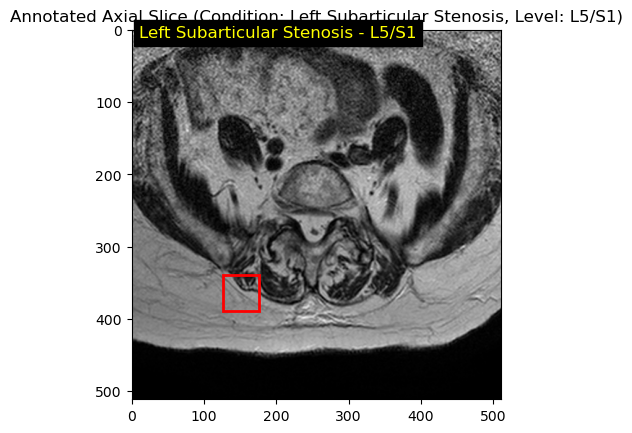

302608236
Axial T2


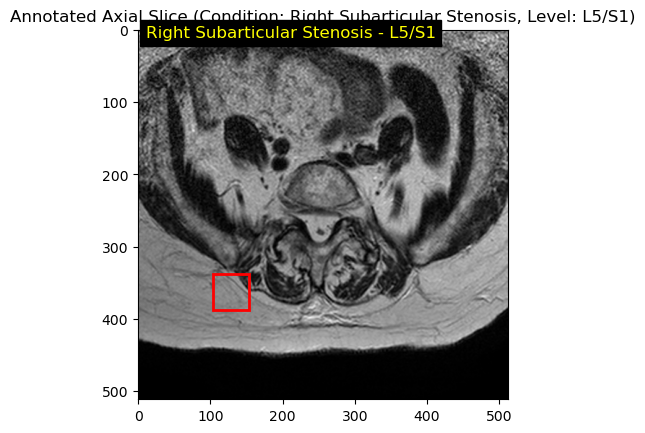

302608236
Axial T2


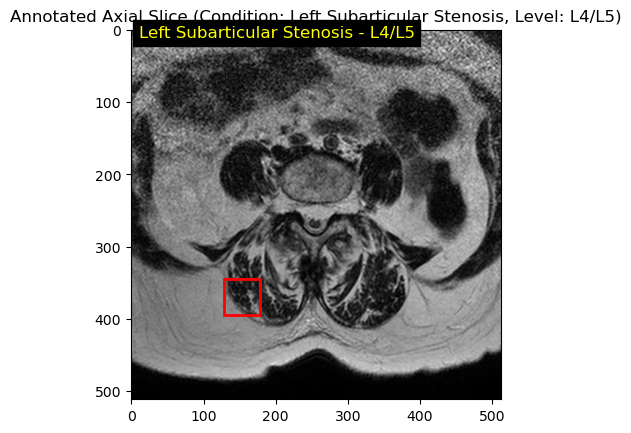

302608236
Axial T2


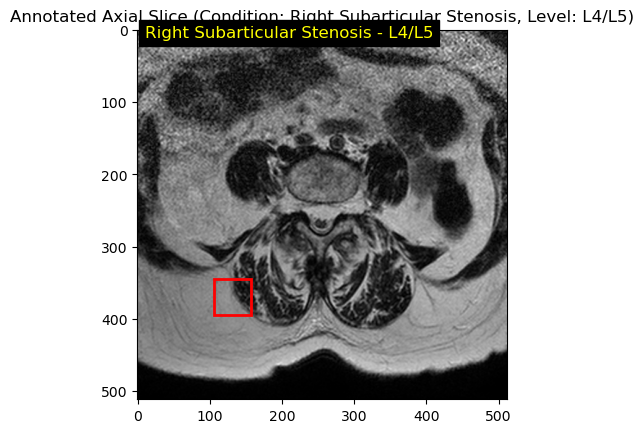

302608236
Axial T2


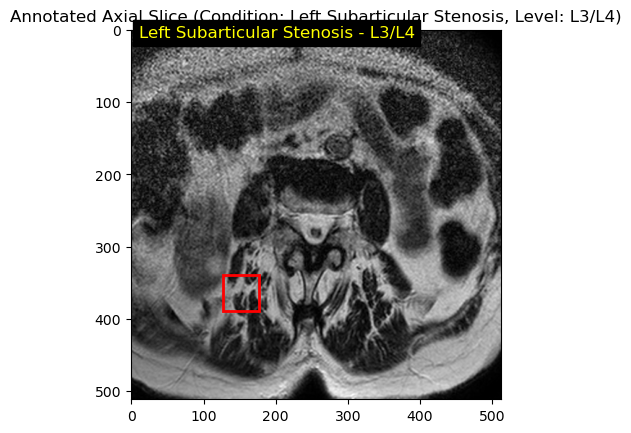

302608236
Axial T2


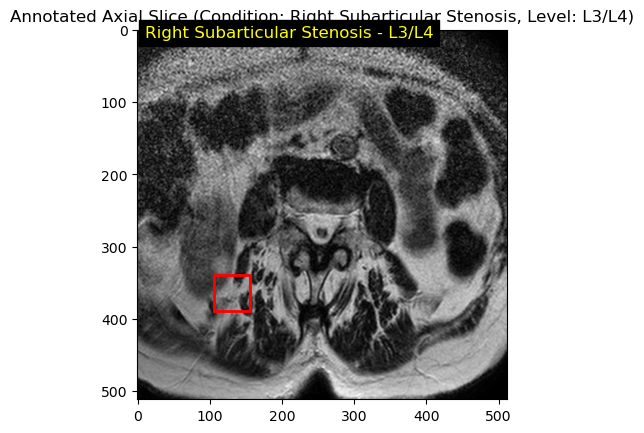

302608236
Axial T2


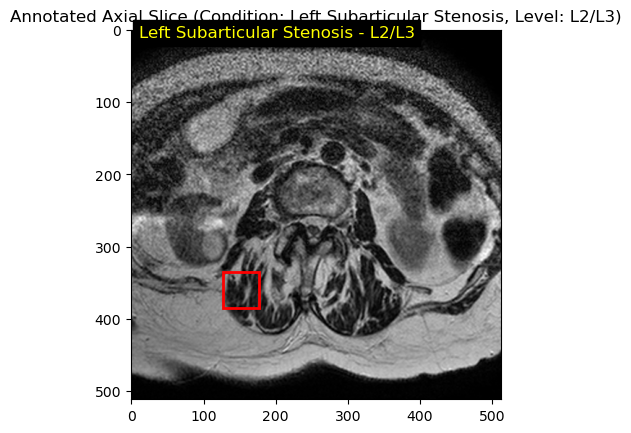

302608236
Axial T2


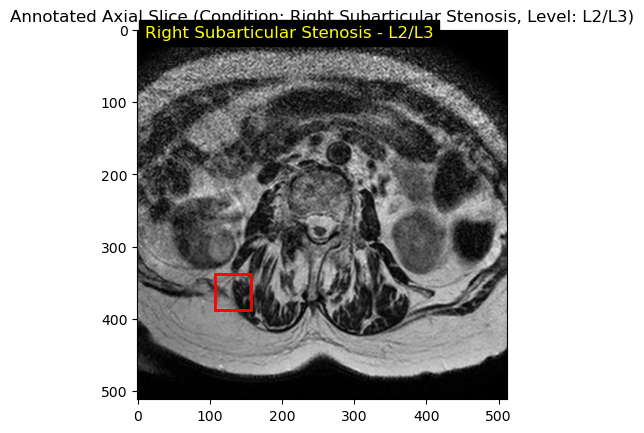

302608236
Axial T2


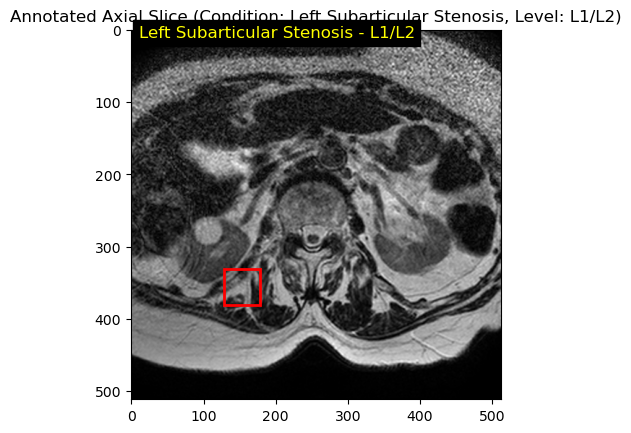

302608236
Axial T2


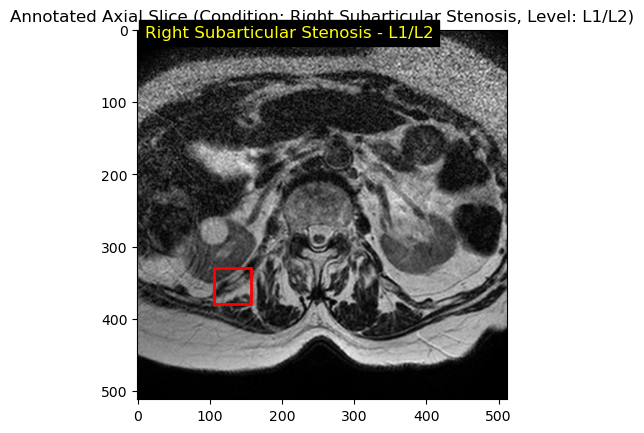

692718517
Sagittal T1


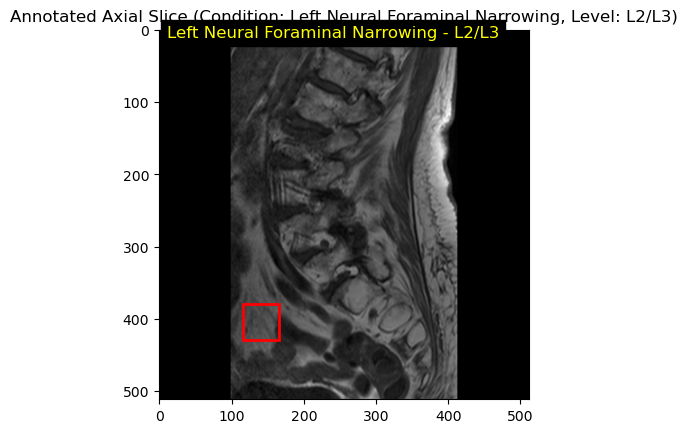

692718517
Sagittal T1


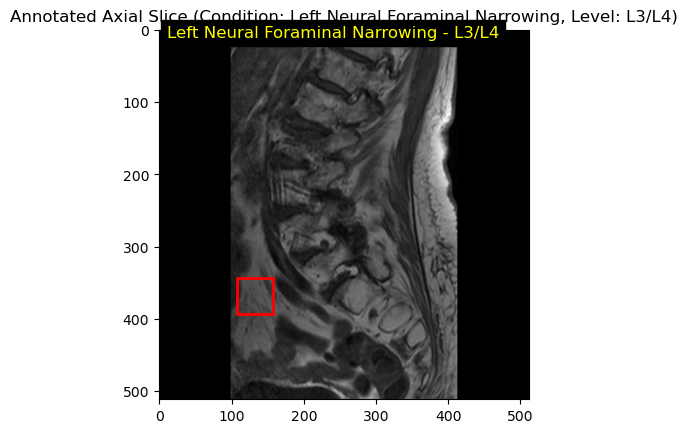

692718517
Sagittal T1


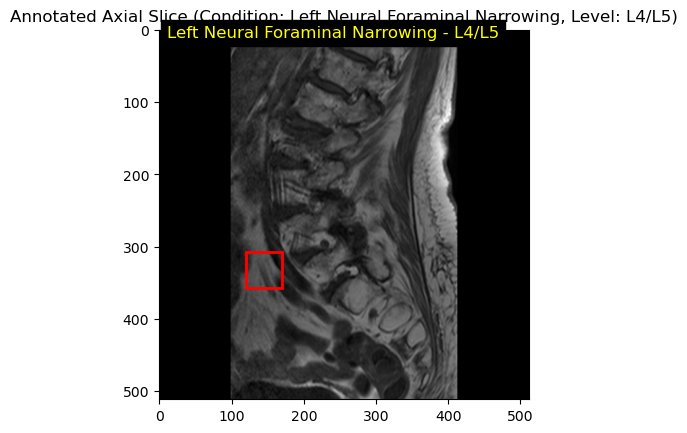

692718517
Sagittal T1


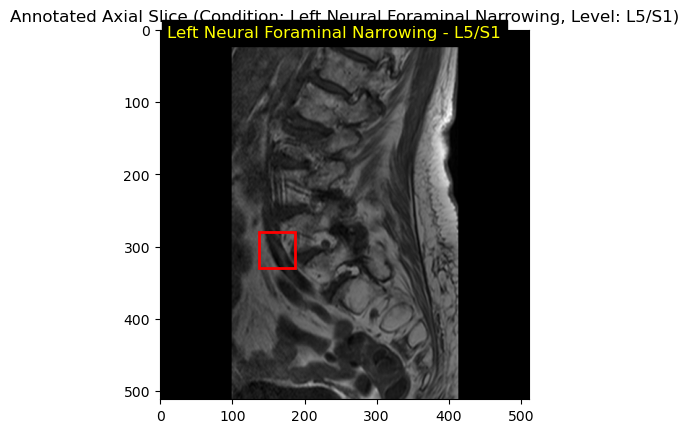

692718517
Sagittal T1


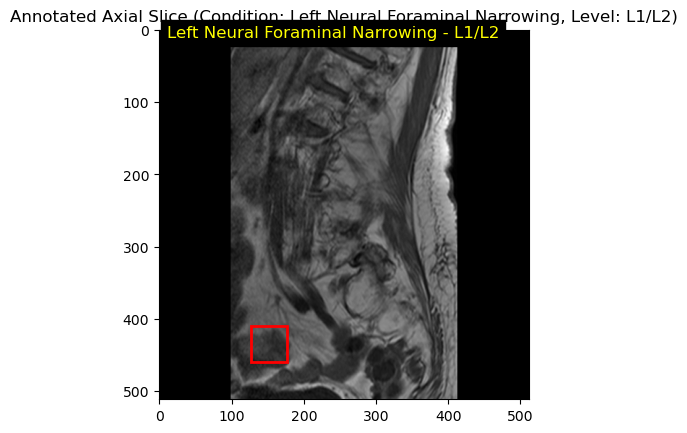

Could not load the image: ./rsna_output/cvt_png/58813022/Sagittal T1/011.png. Skipping...
Could not load the image: ./rsna_output/cvt_png/58813022/Sagittal T1/011.png. Skipping...
Could not load the image: ./rsna_output/cvt_png/58813022/Sagittal T1/011.png. Skipping...
Could not load the image: ./rsna_output/cvt_png/58813022/Sagittal T1/012.png. Skipping...
Could not load the image: ./rsna_output/cvt_png/58813022/Sagittal T1/012.png. Skipping...
3875372861
Sagittal T2_STIR


[ WARN:0@4406.186] global loadsave.cpp:241 findDecoder imread_('./rsna_output/cvt_png/58813022/Sagittal T1/011.png'): can't open/read file: check file path/integrity
[ WARN:0@4406.187] global loadsave.cpp:241 findDecoder imread_('./rsna_output/cvt_png/58813022/Sagittal T1/011.png'): can't open/read file: check file path/integrity
[ WARN:0@4406.188] global loadsave.cpp:241 findDecoder imread_('./rsna_output/cvt_png/58813022/Sagittal T1/011.png'): can't open/read file: check file path/integrity
[ WARN:0@4406.188] global loadsave.cpp:241 findDecoder imread_('./rsna_output/cvt_png/58813022/Sagittal T1/012.png'): can't open/read file: check file path/integrity
[ WARN:0@4406.189] global loadsave.cpp:241 findDecoder imread_('./rsna_output/cvt_png/58813022/Sagittal T1/012.png'): can't open/read file: check file path/integrity


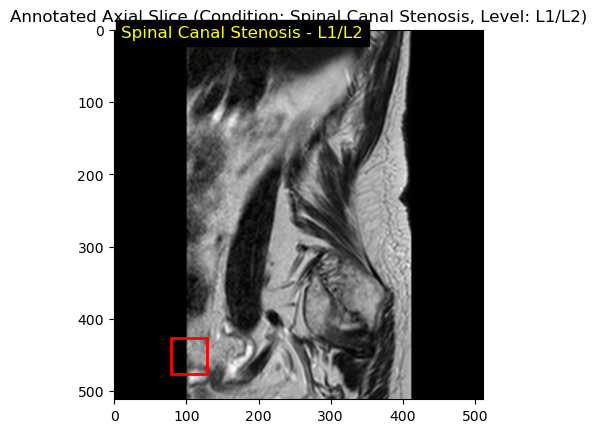

3875372861
Sagittal T2_STIR


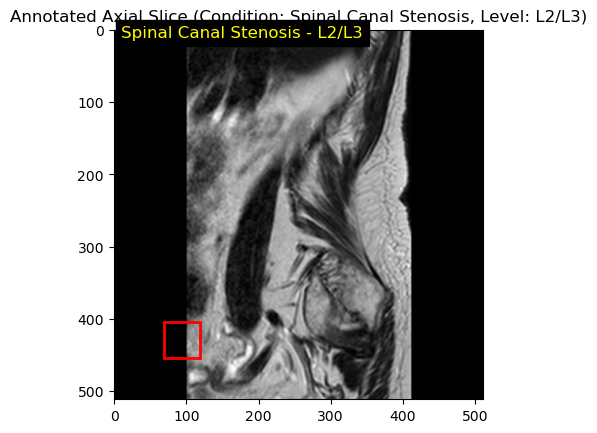

3875372861
Sagittal T2_STIR


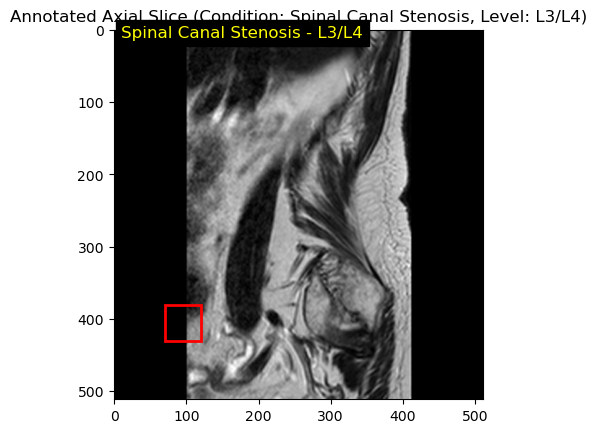

3875372861
Sagittal T2_STIR


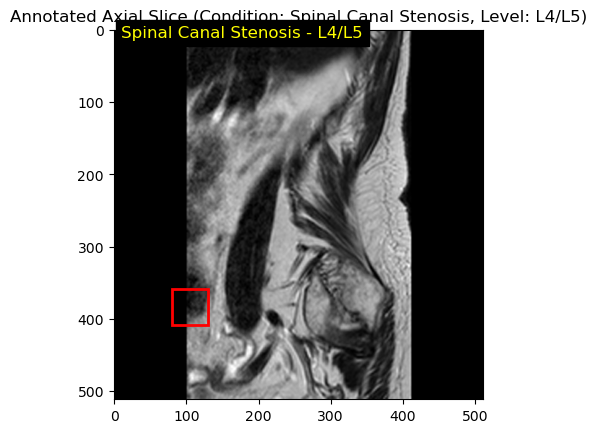

3875372861
Sagittal T2_STIR


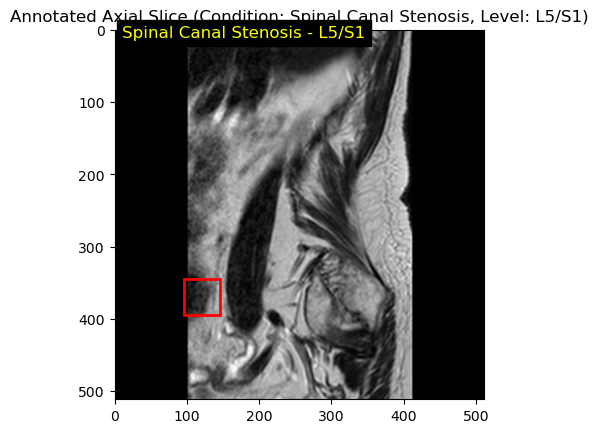

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
import numpy as np
import cv2

def plot_annotated_slice(dataset, idx):
    # Fetch the image, label, and annotation mask from the dataset
    x, label, annotation_mask = dataset[idx]
    
    # Fetch study information
    study_id = dataset.df.iloc[idx]['study_id']
    print(f"Study ID: {study_id}")
    
    # Coordinates for the condition-level annotations
    condition_coords = dataset.coordinates_df[dataset.coordinates_df['study_id'] == study_id]
    
    # Ensure there is an annotation for this study
    if condition_coords.empty:
        print("No annotations for this study.")
        return
    
    # Extract the relevant axial slice where the annotation is present
    for _, row in condition_coords.iterrows():
        condition = row['condition']
        level = row['level']
        x_coord, y_coord, instance_num = row['x'], row['y'], row['instance_number']
        series_id = row['series_id']  # Use series_id to find the correct series

        # Fetch the series_description using series_id
        series_description = dataset.series_description_df[dataset.series_description_df['series_id'] == series_id]['series_description'].values[0]
        
        # Load the original image to get its size
        image_path = f'./rsna_output/cvt_png/{study_id}/{series_description}/{instance_num:03d}.png'
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if original_image is None:
            print(f"Could not load the image: {image_path}. Skipping...")
            continue  # Skip this image and continue with the next iteration
        
        original_img_size = original_image.shape  # (height, width)

        # Calculate scaling factors based on original and resized image dimensions
        x_scale = dataset.img_size[1] / original_img_size[1]  # Scaling factor for x-coordinates
        y_scale = dataset.img_size[0] / original_img_size[0]  # Scaling factor for y-coordinates
        
        # Adjust the y_coord for top-left origin and scale coordinates
        x_coord_resized = x_coord * x_scale
        y_coord_resized = (dataset.img_size[0] - y_coord * y_scale)  # Adjust y and scale
        
        # Plot the Axial Slice with a bounding box
        fig, ax = plt.subplots(1)
        ax.imshow(original_image, cmap='gray')
        print(series_id)
        print(series_description)
        # Create a Rectangle patch for annotation
        if x_coord != -1 and y_coord != -1:  # Only if valid coordinates
            rect = patches.Rectangle((x_coord_resized - 25, y_coord_resized - 25), 50, 50, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        
        # Add the label to the plot (Condition and Level)
        ax.text(10, 10, f'{condition} - {level}', color='yellow', fontsize=12, backgroundcolor='black')
        
        # Show the plot
        plt.title(f"Annotated Axial Slice (Condition: {condition}, Level: {level})")
        plt.show()

# Example usage:
# Assuming you have a 'dataset' object created using the RSNA24Dataset class
plot_annotated_slice(tmp_ds, idx=20)  # Visualize the sample in the dataset


In [64]:
series_description_df[0:4]

study_id   series_id series_description
0   4003253   702807833   Sagittal T2_STIR
1   4003253  1054713880        Sagittal T1
2   4003253  2448190387           Axial T2
3   4646740  3201256954           Axial T2

In [63]:
coordinates_df[0:60]

study_id   series_id  instance_number                         condition  \
0    4003253   702807833                8             Spinal Canal Stenosis   
1    4003253   702807833                8             Spinal Canal Stenosis   
2    4003253   702807833                8             Spinal Canal Stenosis   
3    4003253   702807833                8             Spinal Canal Stenosis   
4    4003253   702807833                8             Spinal Canal Stenosis   
5    4003253  1054713880                4  Right Neural Foraminal Narrowing   
6    4003253  1054713880                4  Right Neural Foraminal Narrowing   
7    4003253  1054713880                5  Right Neural Foraminal Narrowing   
8    4003253  1054713880                6  Right Neural Foraminal Narrowing   
9    4003253  1054713880                6  Right Neural Foraminal Narrowing   
10   4003253  1054713880               11   Left Neural Foraminal Narrowing   
11   4003253  1054713880               11   Left Neural Foraminal Narrowing   
12   4003253  1054713880               11   Left Neural Foraminal Narrowing   
13   4003253  1054713880               12   Left Neural Foraminal Narrowing   
14   4003253  1054713880               12   Left Neural Foraminal Narrowing   
15   4003253  2448190387                3        Left Subarticular Stenosis   
16   4003253  2448190387                4       Right Subarticular Stenosis   
17   4003253  2448190387               11        Left Subarticular Stenosis   
18   4003253  2448190387               11       Right Subarticular Stenosis   
19   4003253  2448190387               19        Left Subarticular Stenosis   
20   4003253  2448190387               19       Right Subarticular Stenosis   
21   4003253  2448190387               28        Left Subarticular Stenosis   
22   4003253  2448190387               28       Right Subarticular Stenosis   
23   4003253  2448190387               35        Left Subarticular Stenosis   
24   4003253  2448190387               35       Right Subarticular Stenosis   
25   4646740  3201256954               15       Right Subarticular Stenosis   
26   4646740  3201256954               16        Left Subarticular Stenosis   
27   4646740  3201256954               22        Left Subarticular Stenosis   
28   4646740  3201256954               22       Right Subarticular Stenosis   
29   4646740  3201256954               28       Right Subarticular Stenosis   
30   4646740  3201256954               29        Left Subarticular Stenosis   
31   4646740  3201256954               34        Left Subarticular Stenosis   
32   4646740  3201256954               34       Right Subarticular Stenosis   
33   4646740  3201256954               40        Left Subarticular Stenosis   
34   4646740  3201256954               40       Right Subarticular Stenosis   
35   4646740  3486248476                5   Left Neural Foraminal Narrowing   
36   4646740  3486248476                5   Left Neural Foraminal Narrowing   
37   4646740  3486248476                5   Left Neural Foraminal Narrowing   
38   4646740  3486248476                6   Left Neural Foraminal Narrowing   
39   4646740  3486248476                7   Left Neural Foraminal Narrowing   
40   4646740  3486248476               15  Right Neural Foraminal Narrowing   
41   4646740  3486248476               15  Right Neural Foraminal Narrowing   
42   4646740  3486248476               16  Right Neural Foraminal Narrowing   
43   4646740  3486248476               17  Right Neural Foraminal Narrowing   
44   4646740  3486248476               17  Right Neural Foraminal Narrowing   
45   4646740  3666319702                9             Spinal Canal Stenosis   
46   4646740  3666319702               10             Spinal Canal Stenosis   
47   4646740  3666319702               10             Spinal Canal Stenosis   
48   4646740  3666319702               10             Spinal Canal Stenosis   
49   4646740  3666319702               11             

In [ ]:
# Example usage
tmp_ds = RSNA24Dataset(df, coordinates_df, series_description_df)
tmp_dl = DataLoader(
    tmp_ds,
    batch_size=2,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
    num_workers=0
)

# Visualizing sample batch
for i, (x, label, annotations) in enumerate(tmp_dl):
    if i == 0:  # Visualize the first sample
        print(f"Image tensor shape: {x.shape}")
        print(f"Labels: {label}")
        print(f"Annotations: {annotations}")
        break

In [ ]:
import torch
import torch.nn as nn

class CNNHybridModel(nn.Module):
    def __init__(self, in_channels=30, num_classes=25):
        super(CNNHybridModel, self).__init__()
        
        # CNN backbone
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 64 * 64, 1024)  # Adjust input size based on downsampling
        self.fc2 = nn.Linear(1024, 512)
        
        # Classification head for conditions
        self.fc_class = nn.Linear(512, num_classes)
        
        # Regression head for coordinates
        self.fc_coord = nn.Linear(512, 2)
        
    def forward(self, x):
        # Pass input through the convolutional layers and pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
    
        # Flatten the feature maps
        x = x.reshape(x.size(0), -1)  # Use reshape instead of view
    
        # Fully connected layers
        x = F.relu(self.fc1(x))
        
        # Output branches
        condition_pred = self.fc2(x)  # Predicts condition labels
        coord_pred = self.fc3(x)  # Predicts coordinates
        
        return condition_pred, coord_pred



In [ ]:
model = CNNHybridModel(in_channels=30, num_classes=25)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define losses
classification_loss_fn = nn.BCELoss()  # For condition classification
regression_loss_fn = nn.MSELoss()  # For coordinate prediction


In [ ]:
def train_model(model, dataloader, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(dataloader):
            images = images.permute(0, 3, 1, 2).float()  # Convert to [batch_size, channels, height, width]
            condition_labels = labels[:, :25]  # First 25 are condition labels
            coord_labels = labels[:, 25:]  # Last 2 are coordinates (x, y)
            
            # Forward pass
            optimizer.zero_grad()
            condition_pred, coord_pred = model(images)
            
            # Calculate losses
            classification_loss = classification_loss_fn(condition_pred, condition_labels)
            regression_loss = regression_loss_fn(coord_pred, coord_labels)
            total_loss = classification_loss + regression_loss
            
            # Backward pass and optimization
            total_loss.backward()
            optimizer.step()
            
            running_loss += total_loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader)}")

# Train the model
train_model(model, tmp_dl, optimizer, num_epochs=10)


In [ ]:
import numpy as np
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import os
from glob import glob
import random

# Assuming IMG_SIZE and IN_CHANS are defined globally
IMG_SIZE = [512, 512]
IN_CHANS = 30  # Number of input channels (10 per modality)
id2label = {0: 'Normal/Mild', 1: 'Moderate', 2: 'Severe'}  # Severity labels

# Color map for the different vertebral levels
level_color_map = {
    'L1/L2': 'red',
    'L2/L3': 'green',
    'L3/L4': 'blue',
    'L4/L5': 'yellow',
    'L5/S1': 'purple'
}

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, phase='train', transform=None):
        """
        Args:
        df: DataFrame with severity labels from train.csv
        coordinates_df: DataFrame with x/y coordinates from train_label_coordinates.csv
        transform: Data augmentation/transformation to apply to the images
        """
        self.df = df
        self.coordinates_df = coordinates_df
        self.transform = transform
        self.phase = phase
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor (IMG_SIZE x IMG_SIZE x IN_CHANS)
        x = np.zeros((IMG_SIZE[0], IMG_SIZE[1], IN_CHANS), dtype=np.uint8)
        t = self.df.iloc[idx]  # Get the current row of severity data
        st_id = int(t['study_id'])  # Study ID

        # Prepare severity label for all conditions/levels in a dictionary
        severity_labels = t[1:].values.astype(np.int64)
        
        # Load MRI images from different series descriptions
        x = self.load_mri_images(st_id)

        # Get the condition-specific x/y coordinates
        condition_coordinates = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        
        # Pick a random condition for visualization purposes
        if not condition_coordinates.empty:
            row = condition_coordinates.sample().iloc[0]
            condition = row['condition']
            level = row['level']
            x_coord, y_coord = row['x'], row['y']
        else:
            condition, level, x_coord, y_coord = None, None, None, None

        # Apply transformations if provided (e.g., augmentation)
        if self.transform is not None:
            x = self.transform(image=x)['image']

        # Transpose to match PyTorch expected shape (channels, height, width)
        x = x.transpose(2, 0, 1)

        # Return image, severity labels, condition, and coordinates
        return x, severity_labels, (condition, level, x_coord, y_coord)

    def load_mri_images(self, st_id):
        """
        Load MRI images for a given study ID and populate the image tensor.
        """
        x = np.zeros((IMG_SIZE[0], IMG_SIZE[1], IN_CHANS), dtype=np.uint8)
        
        # Sagittal T1
        for i in range(0, 10, 1):
            try:
                p = f'./rsna_output/cvt_png/{st_id}/Sagittal T1/{i:03d}.png'
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i] = img.astype(np.uint8)
            except:
                pass
            
        # Sagittal T2/STIR
        for i in range(0, 10, 1):
            try:
                p = f'./rsna_output/cvt_png/{st_id}/Sagittal T2_STIR/{i:03d}.png'
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i+10] = img.astype(np.uint8)
            except:
                pass
            
        # Axial T2
        axt2 = glob(f'./rsna_output/cvt_png/{st_id}/Axial T2/*.png')
        axt2 = sorted(axt2)
    
        step = len(axt2) / 10.0
        st = len(axt2)/2.0 - 4.0*step
        end = len(axt2)+0.0001
                
        for i, j in enumerate(np.arange(st, end, step)):
            try:
                p = axt2[max(0, int((j-0.5001).round()))]
                img = Image.open(p).convert('L')
                img = np.array(img)
                x[..., i+20] = img.astype(np.uint8)
            except:
                pass  
            
        return x



In [ ]:
# Instead of combining only the first three channels, display all channels in a grid
def visualize_sample(image, condition, level, x, y, severity):
    if condition is None or level is None:
        print("No condition or level found.")
        return

    # Create a grid of all the channels (assuming 30 channels total)
    num_channels = 20
    num_cols = 5  # Display 5 images per row
    num_rows = (num_channels + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

    # Plot each channel in a separate subplot
    for i in range(num_channels):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(image[i, :, :], cmap='gray')
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')

        # If this channel is relevant, plot the box
        if condition and x and y and i == 0:  # Example: draw the box in the first channel
            box_size = 50
            color = level_color_map.get(level, 'red')
            ax.add_patch(plt.Rectangle((x - box_size // 2, y - box_size // 2), box_size, box_size, 
                                       linewidth=2, edgecolor=color, facecolor='none'))
            ax.text(x, y, f"{condition} - {level} - {severity}", color=color, fontsize=8, backgroundcolor='white')

    plt.tight_layout()
    plt.show()


In [ ]:
# Testing the DataLoader and Visualization
tmp_ds = RSNA24Dataset(df, coordinates_df, phase='train')
tmp_dl = DataLoader(tmp_ds, batch_size=1, shuffle=True)

# Visualizing a random sample
for i, (x, severity_labels, (condition, level, x_coord, y_coord)) in enumerate(tmp_dl):
    if i == 1:  # Let's just visualize one sample
        severity = id2label[int(severity_labels[0][0])]  # Convert tensor to integer
        print(f"Severity: {severity}")
        visualize_sample(x.numpy()[0], condition, level, x_coord, y_coord, severity)
        break


In [ ]:
# Perform A data Augmentation
import albumentations as A

IMG_SIZE = [512, 512]

transforms_val = A.Compose([
    A.Resize(IMG_SIZE[0], IMG_SIZE[1]),
    A.Normalize(mean=0.5, std=0.5)
])

In [ ]:
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

IN_CHANS = 30

# Testing DataLoader
tmp_ds = RSNA24Dataset(df, phase='train', transform=transforms_val)
tmp_dl = DataLoader(
            tmp_ds,
            batch_size=2,
            shuffle=False,
            pin_memory=True,
            drop_last=False,
            num_workers=0
            )

for i, (x, t) in enumerate(tmp_dl):
    if i==4:break
    print('x stat:', x.shape, x.min(), x.max(),x.mean(), x.std())
    print(t, t.shape)
    y = x.numpy().transpose(0,2,3,1)[0,...,:3]
    y = (y + 1) / 2
    plt.imshow(y)
    plt.show()
    print('y stat:', y.shape, y.min(), y.max(),y.mean(), y.std())
    print()
plt.close()
del tmp_ds, tmp_dl


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Severity label mapping
id2label = {0: 'Normal/Mild', 1: 'Moderate', 2: 'Severe'}


# Function to load and visualize the image with the coordinates and severity
def plot_image_with_coordinates(study_id, series_id, instance_number, x, y, condition, level):
    # Construct the path (adjust the path if necessary based on your directory structure)
    series_description = series_description_df.loc[
    (series_description_df['study_id'] == study_id) & 
    (series_description_df['series_id'] == series_id)]['series_description'].values[0]
    
    image_path = f'./rsna_output/cvt_png/{study_id}/{series_description}/{instance_number:03d}.png'
    
    if os.path.exists(image_path):
        # Load the image
        img = Image.open(image_path)
        
        # Modify the level to replace '/' with '_'
        level_modified = level.lower().replace("/", "_")
        
        # Retrieve the severity from the relevant column in the df DataFrame
        severity_column = f'{condition.lower().replace(" ", "_")}_{level_modified}'
        
        # Check if the column exists before attempting to access it
        if severity_column in df.columns:
            severity_id = df.loc[df['study_id'] == study_id, severity_column].values[0]
            severity_label = id2label[severity_id]  # Convert severity ID to label
        else:
            print(f"Severity column {severity_column} not found.")
            return
        
        # Flip the y-coordinate to match the bottom-left origin
        flipped_y = img.size[1] - y
        
        # Plot the image
        plt.imshow(img, cmap='gray')
        plt.gca().add_patch(plt.Rectangle((x-50, flipped_y-50), 100, 100, linewidth=2, edgecolor='red', facecolor='none', label=f"Center ({condition}, {level})"))
        plt.legend()
        plt.title(f'Study {study_id} - Instance {instance_number} ({condition}, {level}) - Severity: {severity_label}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Image not found for Study {study_id}, Series_description {series_description}, Series {series_id}, Instance {instance_number}")

# Example: Plot one sample from the coordinates dataframe
# Choosing a known sample
study_id_value = 4646740
condition_value = CONDITIONS[2]
level_value = LEVELS[0]

sample = coordinates_df.loc[
    (coordinates_df['study_id'] == study_id_value) & 
    (coordinates_df['condition'] == condition_value) & 
    (coordinates_df['level'] == level_value)
]

plot_image_with_coordinates(
    sample['study_id'].values[0], 
    sample['series_id'].values[0], 
    sample['instance_number'].values[0], 
    sample['x'].values[0], 
    sample['y'].values[0], 
    sample['condition'].values[0], 
    sample['level'].values[0]
)


In [ ]:
import os
import torch
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from glob import glob
from PIL import Image

IMG_SIZE = [512, 512]  # Image dimensions (height, width)
IN_CHANS = 70  # Total number of slices, accounting for maximum Axial slices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Precomputed mean and std for medical images (you can calculate them for your specific dataset)
IMG_MEAN = 0.5  # Example value, replace with actual mean if calculated
IMG_STD = 0.25  # Example value, replace with actual std if calculated

class RSNA24Dataset(Dataset):
    def __init__(self, df, coordinates_df, series_description_df, img_size=(512, 512), in_chans=70, transform=None):
        self.df = df
        self.coordinates_df = coordinates_df
        self.series_description_df = series_description_df
        self.img_size = img_size
        self.in_chans = in_chans
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Initialize the image tensor for all slices
        x = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)
        annotation_mask = np.zeros((self.img_size[0], self.img_size[1], self.in_chans), dtype=np.float32)  # Mask to highlight annotated slices

        t = self.df.iloc[idx]
        st_id = t['study_id']  # Get the study ID
        label = t[1:].values.astype(np.int64)  # Labels for conditions and levels

        # Load images from the given study_id across different series descriptions
        series_descriptions = ['Sagittal T1', 'Sagittal T2_STIR', 'Axial T2']
        channel_offset = 0

        for desc in series_descriptions:
            images = glob(f'./rsna_output/cvt_png/{st_id}/{desc}/*.png')
            images = sorted(images)
            slice_num = self.in_chans - 20
            if desc == 'Axial T2':
                num_images = len(images)
                if num_images > slice_num:
                    # Truncate the number of Axial slices to 50 if more are available
                    images = images[:slice_num]
                elif num_images < slice_num:
                    # Pad with None if there are fewer than 50 Axial slices
                    padding_slices = slice_num - num_images
                    images += [None] * padding_slices  # Add None placeholders for padding
            else:
                num_images = min(len(images), 10)  # Sagittal limited to 10 slices
        
            for i in range(len(images)):  # Use len(images) for proper loop range
                if images[i] is not None:  # Load and process valid images
                    try:
                        img = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
                        img_resized = cv2.resize(img, (self.img_size[1], self.img_size[0]))
                        x[..., channel_offset + i] = img_resized.astype(np.float32)
                    except Exception as e:
                        continue
                else:
                    # Padding: leave the channel as zeros (already initialized as zeros)
                    continue
        
            channel_offset += len(images)  # Update offset based on number of slices loaded

        # Normalize the image data: [0, 1] scaling
        x = x / 255.0
        
        # Apply mean and std normalization
        x = (x - IMG_MEAN) / IMG_STD

        # Process annotations for the current study
        condition_coords = self.coordinates_df[self.coordinates_df['study_id'] == st_id]
        if not condition_coords.empty:
            for _, row in condition_coords.iterrows():
                x_coord, y_coord, instance_num = row['x'], row['y'], row['instance_number']
                slice_index = instance_num - 1  # Convert instance number to zero-based index
                if 0 <= slice_index < self.in_chans:
                    # Apply the annotation to the mask for the corresponding slice
                    if x_coord != -1 and y_coord != -1:  # Valid coordinates
                        annotation_mask[..., slice_index] = 1  # Highlight this slice
        else:
            annotation_mask[..., :] = 0  # No annotations for the entire study

        return x, label, annotation_mask
